# SVR(Destek Model Regresyonu)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [4]:
from sklearn.svm import SVR

In [5]:
svr_model = SVR("linear").fit(X_train,y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [6]:
svr_pred = SVR("linear").fit(X_train,y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [7]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [8]:
print("y = {0} + {1} x".format(svr_model.intercept_[0],svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [9]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [10]:
-48.69756097561513 + 4.969512195122093*91.0

403.5280487804953

In [11]:
X_train["Hits"][1:2]

229    144.0
Name: Hits, dtype: float64

In [12]:
-48.69756097561513 + 4.969512195122093*144.0

666.9121951219662

In [13]:
y_pred = svr_model.predict(X_train)

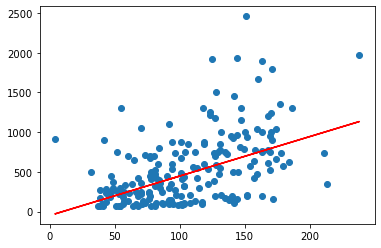

In [14]:
X_train = np.array(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred,color = "r")

In [15]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train,y_train)
lm_pred = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_,lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [16]:
-8.814095480334345 + 5.172456135470686 *91.0

461.87941284749803

Text(0, 0.5, 'Maaş (Salary)')

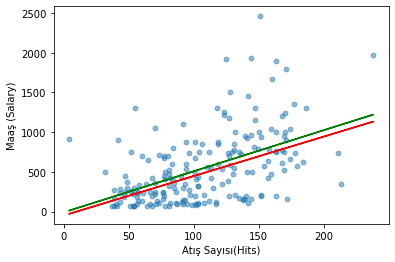

In [17]:
plt.scatter(X_train,y_train,alpha = 0.5,s =23)
plt.plot(X_train,lm_pred,"g")
plt.plot(X_train,y_pred,color = "r")

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")


# Tahmin 

In [18]:
print("y = {0} + {1} x".format(svr_model.intercept_[0],svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [20]:
svr_model.predict([[91]])

array([403.52804878])

In [21]:
y_pred = svr_model.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test,y_pred))

459.0187960365147

# Model Tuning

In [23]:
svr_model

SVR(kernel='linear')

In [24]:
from sklearn.model_selection import GridSearchCV
svr_params = {"C":np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model,svr_params,cv = 10).fit(X_train,y_train)

In [25]:
svr_cv_model.best_params_

{'C': 0.1}

In [26]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [28]:
svr_tuned = SVR("linear",C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [29]:
y_pred = svr_tuned.predict(X_test)

In [30]:
np.sqrt(mean_squared_error(y_test,y_pred))

458.198966781116

# Doğrusal Olmayan SVR

In [34]:
np.random.seed(3)

x_sim = np.random.uniform(2,10,145)
y_sim = np.sin(x_sim) + np.random.normal(0,0.4,145)

x_outliers = np.arange(2.5,5,145)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim,x_outliers]))
x_sim = np.concatenate([x_sim,x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim,y_outliers])[x_sim_idx]

In [35]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:,np.newaxis]),y_sim)
ols_pred = ols.predict(np.sin(x_sim[:,np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR("rbf",epsilon = eps)
svr.fit(x_sim[:,np.newaxis],y_sim)
svr_pred = svr.predict(x_sim[:,np.newaxis])

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=rbf as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


<ipython-input-36-0553312916ab>:8: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001BC1202B3D0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([plt_ols,plt_svr],["EKK","SVR"],loc = 4);
<ipython-input-36-0553312916ab>:8: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001BC1202B670>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([plt_ols,plt_svr],["EKK","SVR"],loc = 4);


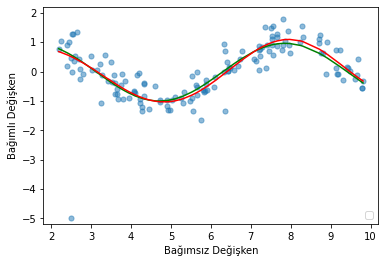

In [36]:
import matplotlib.pyplot as plt
plt.scatter(x_sim,y_sim,alpha = 0.5,s = 26)
plt_ols = plt.plot(x_sim,ols_pred,"g")
plt_svr = plt.plot(x_sim,svr_pred,color = "r")
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2,2.2)
plt.legend([plt_ols,plt_svr],["EKK","SVR"],loc = 4);

In [37]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [38]:
svr_rbf = SVR("rbf").fit(X_train,y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=rbf as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# Tahmin

In [39]:
y_pred = svr_rbf.predict(X_test)

In [40]:
np.sqrt(mean_squared_error(y_test,y_pred))

460.0032657244849

# Model Tuning

In [42]:
svr_params = {"C": [0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params,cv = 10)
svr_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [45]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [47]:
svr_tuned = SVR("rbf",C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

In [48]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

428.00406888095694